### **本节介绍决策树算法的应用**

**具体过程：**

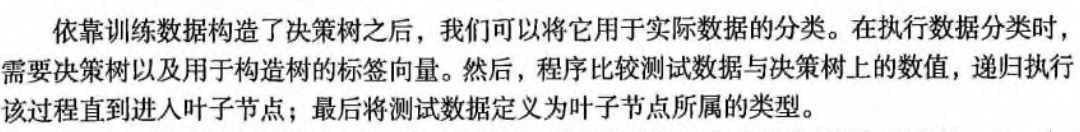

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import decision_trees as dt
import tree_ploter as tp

**下面是决策树的使用**

In [2]:
# 使用已经建立好的决策树
def classify(inputTree,featLabels,testVec):
    # testVec为单个测试向量
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr] # 获取子节点数据
    featIndex = featLabels.index(firstStr) # 将标签字符串转化为索引
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [3]:
# 获取训练数据，并生成决策树
train_datas,train_labels = dt.createDataSet()
print(train_datas)
print(train_labels)
my_tree = dt.createTree(train_datas,train_labels.copy())
print(my_tree)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [4]:
print(train_labels)
# 发现train_labels少了一个元素，故上面用copy

['no surfacing', 'flippers']


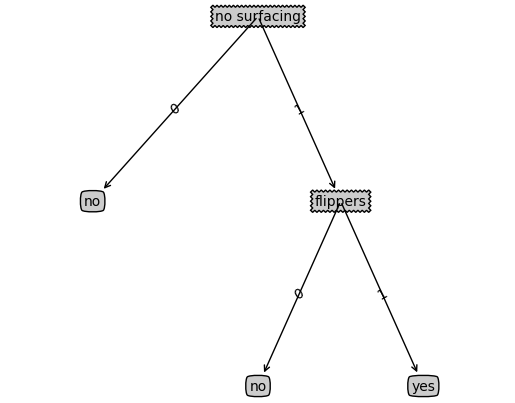

In [5]:
# 绘制决策树
tp.createPlot(my_tree)

In [6]:
# 测试
unknow_test = [1,0]
print(classify(my_tree,train_labels,unknow_test))

unknow_test = [1,1]
print(classify(my_tree,train_labels,unknow_test))

# 结果正确

no
yes


**下面是决策树的存储**

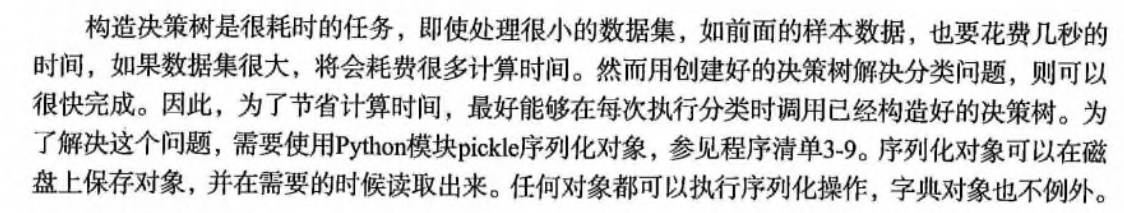

In [7]:
# 存储决策树（字典形式）
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()

# 获取决策树（python对象）    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [8]:
# 存储字典
storeTree(my_tree,'My_learing_tree')

In [9]:
# 获取决策树（字典形式）
my_tree = grabTree('My_learing_tree')
print(my_tree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


**下面是最后的实战**

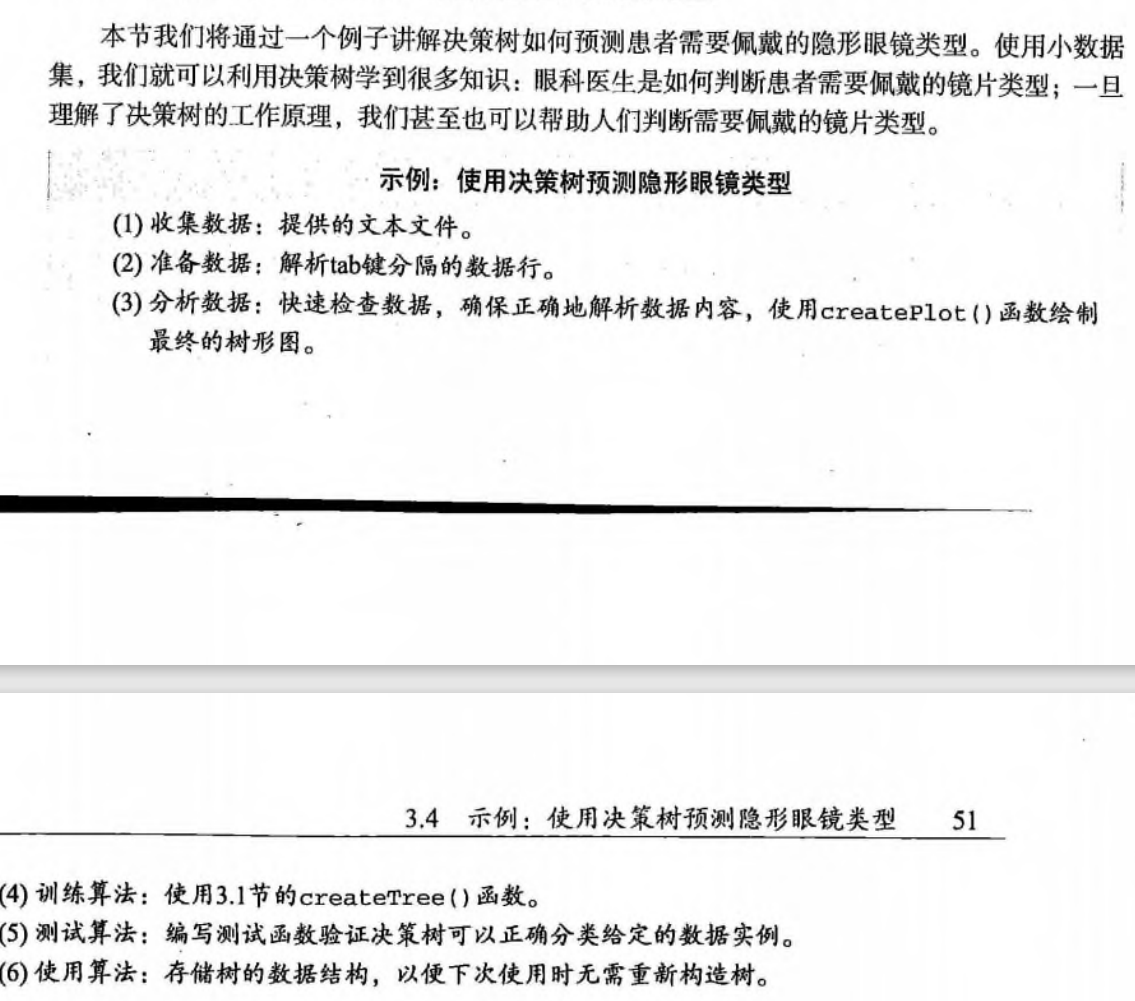

In [10]:
# 下面开始实战

# 获取数据集
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenses_labels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [11]:
# 构建决策树
lenses_tree = dt.createTree(lenses,lenses_labels.copy())
print(lenses_tree)

{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'presbyopic': 'no lenses', 'pre': 'no lenses', 'young': 'hard'}}}}, 'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'pre': 'soft', 'young': 'soft'}}}}, 'reduced': 'no lenses'}}


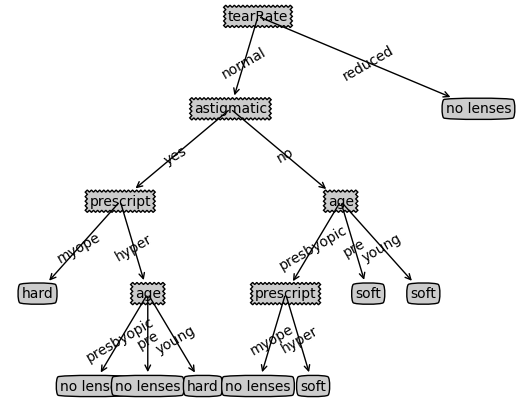

In [12]:
# 决策树的可视化
tp.createPlot(lenses_tree)

In [13]:
# 构建测试向量
lenses_labels = ['age', 'prescript', 'astigmatic', 'tearRate']
unknow_test = ['young','hyper','yes','normal']
print(dt.classify(lenses_tree,lenses_labels,unknow_test))

# 成功分类了

hard


**总结：**

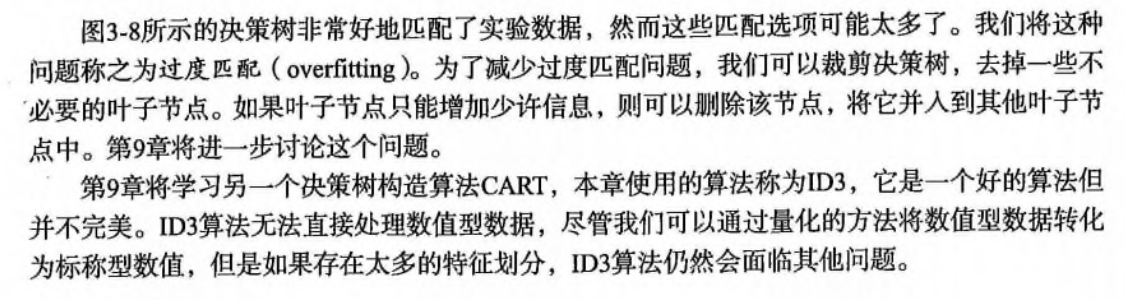